<a href="https://colab.research.google.com/github/maryawamaitha/Data-Visualization-Portfolio-Projects/blob/main/Chemicals_In_Cosmetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The goal of this project to explore 
T- This data setreported to the California Safe Cosmetics Program (CSCP) in the California Department of Public Health (CDPH). The role of CSCP is to collect information on hazardous and potentially hazardous ingredients in cosmetic products sold in California and to make this information available to the public.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/content/chemicals-in-cosmetics.csv')
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


- Exploring the file

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112870 entries, 0 to 112869
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  112870 non-null  int64  
 1   ProductName             112870 non-null  object 
 2   CSFId                   79187 non-null   float64
 3   CSF                     78763 non-null   object 
 4   CompanyId               112870 non-null  int64  
 5   CompanyName             112870 non-null  object 
 6   BrandName               112658 non-null  object 
 7   PrimaryCategoryId       112870 non-null  int64  
 8   PrimaryCategory         112870 non-null  object 
 9   SubCategoryId           112870 non-null  int64  
 10  SubCategory             112870 non-null  object 
 11  CasId                   112870 non-null  int64  
 12  CasNumber               106581 non-null  object 
 13  ChemicalId              112870 non-null  int64  
 14  ChemicalName        

- The are 22 columns and 112,870 rows.
- There are missing values: That will have to be handled.

In [33]:
df.duplicated().sum()

254

- There are duplicated rows.

In [34]:
#Dropping duplicates
# df.drop_duplicates(keep=False, inplace=True)

In [35]:
#Check for the dropped duplicates.
# df.duplicated().sum()

In [36]:
#Drop columns that are unique index and not relevant for the study
# df.drop(columns=['CDPHId', 'CSFId','CSF','CasId','CasNumber','CompanyId'],inplace=True)

- Which Categories of Cosmetic products were in the dataset.

Makeup Products (non-permanent)      74524
Nail Products                        15102
Skin Care Products                    7613
Sun-Related Products                  4939
Bath Products                         3417
Hair Coloring Products                2053
Hair Care Products (non-coloring)     1595
Tattoos and Permanent Makeup          1477
Personal Care Products                 753
Fragrances                             644
Oral Hygiene Products                  482
Shaving Products                       222
Baby Products                           49
Name: PrimaryCategory, dtype: int64


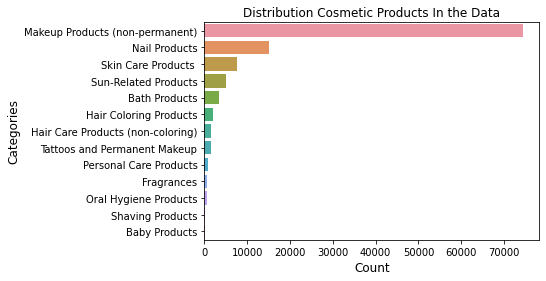

In [37]:
print(df['PrimaryCategory'].value_counts())
sns.countplot(data=df, y='PrimaryCategory',order=df.PrimaryCategory.value_counts().index);
plt.title('Distribution Cosmetic Products In the Data');
plt.ylabel('Categories', fontsize=12);
plt.xlabel('Count', fontsize=12);

- Most products were in the Make-up Products category

In [38]:
df['ChemicalName'].value_counts()

Titanium dioxide                                                                                       92304
Silica, crystalline (airborne particles of respirable size)                                             2676
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Butylated hydroxyanisole                                                                                1882
Mica                                                                                                    1839
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

# Baby Products

- Lets explore the baby products category:
Are there an Chemicals in Baby products?
Have this chemicals been discontinued?

In [39]:
baby_data = df.loc[df['PrimaryCategory'] == 'Baby Products']

Filter to see which baby products have Chemicals

Titanium dioxide                                                                                       22
Cocamide diethanolamine                                                                                 5
Cocamide DEA                                                                                            5
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     4
Retinyl palmitate                                                                                       3
Formaldehyde (gas)                                                                                      3
Trade Secret                                                                                            1
Styrene                                                                                                 1
Cadmium and cadmium compounds                                                                           1
Lead                                          

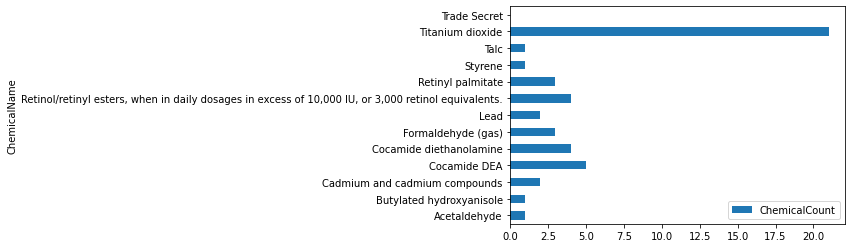

In [49]:
print(baby_data['ChemicalName'].value_counts())
baby_data.groupby(['ChemicalName']).sum().plot(kind='barh',y='ChemicalCount')

In [50]:
baby_chem= baby_data[(~baby_data['ChemicalName']. isna())]
baby_chem[['ProductName','CompanyName','SubCategory','ChemicalName']].head()

,ProductName,CompanyName,SubCategory,ChemicalName
6604,BubbleGum Bubbles No Tears Shampoo,"Farouk Systems, Inc.",Baby Shampoos,Trade Secret
12980,Jasmine Tea Shower Gel,"Buth-na-Bodhaige, Inc",Baby Wash/Soap,Cocamide diethanolamine
12981,Nectarine & Plum Bath & Shower Gel,"Buth-na-Bodhaige, Inc",Baby Wash/Soap,Cocamide diethanolamine
14178,Baby Don't Cry Shampoo,John Paul Mitchell Systems,Baby Shampoos,Styrene
15001,Nature's Gate Organics Baby Soothing Diaper Ra...,LEVLAD LLC,Baby Skin Care,"Retinol/retinyl esters, when in daily dosages ..."


In [43]:
baby_df= baby_data[(~baby_data['DiscontinuedDate']. isna())]
baby_df.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
12980,3083,Jasmine Tea Shower Gel,NaN,NaN,77,"Buth-na-Bodhaige, Inc",The Body Shop,1,Baby Products,158,...,68603-42-9,5136,Cocamide diethanolamine,10/09/2009,02/11/2011,02/11/2011,10/09/2009,10/09/2009,NaN,1
12981,3084,Nectarine & Plum Bath & Shower Gel,NaN,NaN,77,"Buth-na-Bodhaige, Inc",The Body Shop,1,Baby Products,158,...,68603-42-9,5139,Cocamide diethanolamine,10/09/2009,02/11/2011,02/11/2011,10/09/2009,10/09/2009,NaN,1
15001,3450,Nature's Gate Organics Baby Soothing Diaper Ra...,NaN,NaN,1232,LEVLAD LLC,Nature's Gate,1,Baby Products,4,...,79-81-2,6155,"Retinol/retinyl esters, when in daily dosages ...",10/12/2009,06/27/2019,05/31/2009,10/12/2009,10/12/2009,NaN,1
20217,5138,Stelatopia Cream Cleanser,NaN,NaN,304,Expanscience Laboratoires,Mustela,1,Baby Products,4,...,NaN,8915,Titanium dioxide,10/15/2009,02/23/2017,03/15/2017,10/15/2009,10/15/2009,NaN,1
21366,5682,Burt�s Bees Sunscreen SPF 15,9824.0,Titanium Dioxide,305,Burt's Bees Inc.,Burt�s Bees,1,Baby Products,5,...,13463-67-7,9569,Titanium dioxide,10/15/2009,09/04/2013,05/30/2011,10/15/2009,09/04/2013,NaN,1


Summary of Chemicals in Baby Products that were discontinued

In [44]:
baby_df[['ProductName','CompanyName','ChemicalName','DiscontinuedDate']]

,ProductName,CompanyName,ChemicalName,DiscontinuedDate
12980,Jasmine Tea Shower Gel,"Buth-na-Bodhaige, Inc",Cocamide diethanolamine,02/11/2011
12981,Nectarine & Plum Bath & Shower Gel,"Buth-na-Bodhaige, Inc",Cocamide diethanolamine,02/11/2011
15001,Nature's Gate Organics Baby Soothing Diaper Ra...,LEVLAD LLC,"Retinol/retinyl esters, when in daily dosages ...",05/31/2009
20217,Stelatopia Cream Cleanser,Expanscience Laboratoires,Titanium dioxide,03/15/2017
21366,Burt�s Bees Sunscreen SPF 15,Burt's Bees Inc.,Titanium dioxide,05/30/2011
21369,Burt�s Bees Baby Bee Sunscreen Stick SPF30,Burt's Bees Inc.,Titanium dioxide,12/01/2014
39777,SPF 18 Everyday/Year Round Sunscreen Lotion,California Baby,Titanium dioxide,06/10/2016
39779,SPF 18 No Fragrance Sunscreen Lotion,California Baby,Titanium dioxide,06/15/2015
41514,LOVE ETC BODY WASH,"Buth-na-Bodhaige, Inc",Cocamide diethanolamine,07/10/2013
74327,Baby Shampoo,"APLICARE, INC",Formaldehyde (gas),04/30/2018


#Oral Hygiene Products

In [62]:
oral_data = df.loc[df['PrimaryCategory'] == 'Oral Hygiene Products']
oral_data.head(4)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
3581,1134,Herbal Toothpaste,NaN,NaN,71,"Sunrider Manufacturing, L.P.",SunSmile,68,Oral Hygiene Products,69,...,NaN,1244,"Silica, crystalline (airborne particles of res...",09/17/2009,09/23/2013,NaN,09/17/2009,12/05/2013,12/05/2103,0
3582,1134,Herbal Toothpaste,NaN,NaN,71,"Sunrider Manufacturing, L.P.",SunSmile,68,Oral Hygiene Products,69,...,13463-67-7,1245,Titanium dioxide,09/17/2009,09/23/2013,NaN,09/17/2009,09/23/2013,09/16/2013,0
6403,1984,Tabs,NaN,NaN,71,"Sunrider Manufacturing, L.P.",SunSmile,68,Oral Hygiene Products,71,...,NaN,2289,"Silica, crystalline (airborne particles of res...",09/30/2009,12/05/2013,NaN,09/30/2009,12/05/2013,12/05/2103,0
13511,3117,Nature's Gate Advanced Care Peppermint Whiteni...,NaN,NaN,1232,LEVLAD LLC,Nature's Gate,68,Oral Hygiene Products,69,...,13463-67-7,5178,Titanium dioxide,10/09/2009,07/18/2019,NaN,10/09/2009,10/09/2009,NaN,1


Titanium dioxide                                               464
Silica, crystalline (airborne particles of respirable size)     10
Polygeenan                                                       5
Coffee                                                           2
Mineral oils, untreated and mildly treated                       1
Name: ChemicalName, dtype: int64


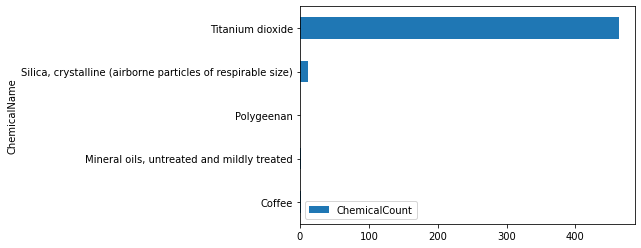

In [53]:
print(oral_data['ChemicalName'].value_counts())
oral_data.groupby(['ChemicalName']).sum().plot(kind='barh',y='ChemicalCount')

Most Oral hygiene products contain titanium dioxide.

- Taking a look at chemicals that were discontinued

In [54]:
oral_df= oral_data[(~oral_data['DiscontinuedDate']. isna())]
oral_df.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
15251,3588,Nature's Gate Whitening Gel Natural Toothpaste,NaN,NaN,1232,LEVLAD LLC,Nature's Gate,68,Oral Hygiene Products,69,...,13463-67-7,6330,Titanium dioxide,10/12/2009,07/10/2019,02/01/2012,10/12/2009,10/12/2009,NaN,1
18897,4488,Tartar Protection Whitening - Cool Mint Gel,NaN,NaN,245,COLGATE-PALMOLIVE COMPANY,Colgate,68,Oral Hygiene Products,69,...,NaN,8057,Titanium dioxide,10/14/2009,02/21/2018,12/20/2014,10/14/2009,10/14/2009,NaN,1
19077,4603,Crest MultiCare Whitening Fluoride Anticavity ...,NaN,NaN,1036,The Procter & Gamble Company,Crest,68,Oral Hygiene Products,69,...,13463-67-7,8220,Titanium dioxide,10/14/2009,06/03/2015,08/01/2011,10/14/2009,06/03/2015,NaN,1
19404,4726,Sparkling White Carribean Cool Gel,NaN,NaN,245,COLGATE-PALMOLIVE COMPANY,Colgate,68,Oral Hygiene Products,69,...,NaN,8373,Titanium dioxide,10/14/2009,01/11/2016,01/01/2011,10/14/2009,10/14/2009,NaN,1
19429,4742,Oxygen Whitening 2 in 1 (Toothpaste & Mouthwash),NaN,NaN,245,COLGATE-PALMOLIVE COMPANY,Colgate,68,Oral Hygiene Products,69,...,13463-67-7,8416,Titanium dioxide,10/14/2009,02/21/2018,01/28/2014,10/14/2009,01/28/2014,01/01/2012,0


In [57]:
disc_oral = oral_df[['ProductName','CompanyName','ChemicalName','DiscontinuedDate']]
disc_oral.head()

,ProductName,CompanyName,ChemicalName,DiscontinuedDate
15251,Nature's Gate Whitening Gel Natural Toothpaste,LEVLAD LLC,Titanium dioxide,02/01/2012
18897,Tartar Protection Whitening - Cool Mint Gel,COLGATE-PALMOLIVE COMPANY,Titanium dioxide,12/20/2014
19077,Crest MultiCare Whitening Fluoride Anticavity ...,The Procter & Gamble Company,Titanium dioxide,08/01/2011
19404,Sparkling White Carribean Cool Gel,COLGATE-PALMOLIVE COMPANY,Titanium dioxide,01/01/2011
19429,Oxygen Whitening 2 in 1 (Toothpaste & Mouthwash),COLGATE-PALMOLIVE COMPANY,Titanium dioxide,01/28/2014
